# Review_by_M3

Below is the __extract_answers_sequence(file_path)__ function from data_extraction_M1. I will call this function later in the code.

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np

def extract_answers_sequence(file_path):

    answers = []
    with open(file_path, "r") as file:
        lines = [line.strip() for line in file.readlines() if line.strip() != ""]

    for i in range(0, len(lines), 5):
        question_block = lines[i:i+5]
        selected = 0
        for j in range(1, 5):
            if "[x]" in question_block[j]:
                selected = j
        answers.append(selected)

    return answers
answers = extract_answers_sequence("output/collated_answers.txt")


### Generate_means_sequence(collated_answers_path)
This function generates the mean answer for each question by using the extract_answer_sequence to extract the answers from the raw collated_answers.txt file. It loops through each respondents answers, counting all non-zero answers (ignoring unanswered questions). The means are then calculated and the returned output is a list of means for each question.

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np


def generate_means_sequence(collated_answers_path):

    answers = extract_answers_sequence("output/collated_answers.txt")
    means = []
    num_questions = 100
    num_respondents = len(answers)//num_questions
    for i in range(num_questions):
        total = 0
        count = 0

        for j in range(num_respondents):
            index = j * num_questions + i
            value = answers[index]
            if value != 0:
                total += value
                count += 1
        mean = total / count if count > 0 else 0
        means.append(mean)
    return means

collated_answers_path = "output/collated_answers.txt"
means = (generate_means_sequence(collated_answers_path))
print(means)

### Visualize_data(collated_answers_path, n) 
This function returns 3 different outputs, depending on the value of n. If:
- n == 1, a scatter plot is returned with questions 1 to 100 as the x-axis, and the means calculated from generate_means_sequence(collated_answer_path) as the y-axis.
- n == 2, a line plot is returned that shows which questions each repsondent answered, with the range(1,101) as the x-axis and the answers on the y-axis.
- n != 1 or 2, an error is printed

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np


def visualize_data(collated_answers_path, n):
    url = "https://raw.githubusercontent.com/tdvl3720-uol/Group-Project---Alan-Turing/refs/heads/main/output/collated_answers.txt"
    response = requests.get(url)
    if response.status_code ==200:
        collated_answers_path = response.text
  
    if n==1:
        x = list(range(1, 101))
        y = means
        plt.scatter(x, y, s=15, marker = '.')
        plt.xlabel("Question number")
        plt.ylabel("Mean value")
        plt.title("Means sequence")

    elif n==2:
        base_url = "https://raw.githubusercontent.com/tdvl3720-uol/Group-Project---Alan-Turing/main/data/"
        file_names = [f"answers_respondent_{i}.txt" for i in range(1, 26)]
        respondent_answers = []

        for file_name in file_names:
            url = base_url + file_name
            response = requests.get(url)
            if response.status_code == 200:
                lines = response.text.splitlines()
                answers = []
                
                for i in range(100):  
                    question_answers = lines[i * 4: (i + 1) * 4]  
                    answer = 0
                    
                    for option in question_answers:
                        if "[x]" in option:
                            answer = 1  
                            break
                            
                    answers.append(answer)
                respondent_answers.append(answers)  
            else:
                print(f"Failed to load {file_name}")

        plt.figure(figsize=(10, 6))
        for i, answers in enumerate(respondent_answers):
            plt.plot(range(1,101), answers, label = f'Respondent_{i+1}')
            plt.xlabel("Question numbers")
            plt.ylabel("Answered(1) / Not Answered(0)")
            plt.title("Individual Answers")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Respondents")
            plt.xticks(np.arange(0, 101, 10))

    else:
        print("error: n!=1, n!=2")


To achieve these plots in Jupyter notebooks, for n == 1, I ran _generate_means_sequence(collated_answers_path)_ in GitHub codespaces, and then copied the outputlist _means_ into my notebook for the y-axis. I also used requests to create a path to the collated_answers.txt file as shown below.

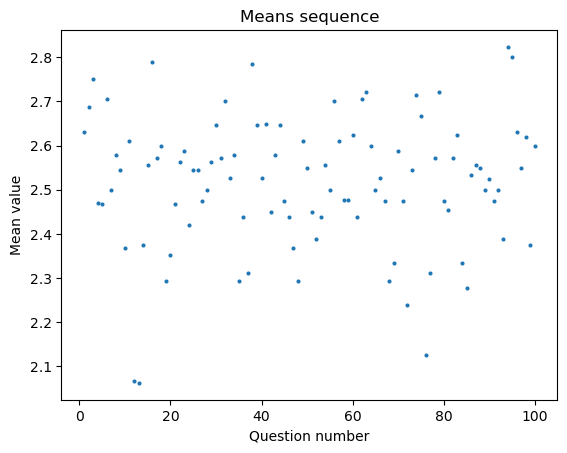

In [2]:
import requests
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/tdvl3720-uol/Group-Project---Alan-Turing/refs/heads/main/output/collated_answers.txt"
response = requests.get(url)
if response.status_code ==200:
    collated_answers_path = response.text


def visualize_data(collated_answers_path, n):
  
    if n==1:
        x = list(range(1, 101))
        y = [2.6315789473684212, 2.6875, 2.75, 2.4705882352941178, 2.466666666666667, 2.7058823529411766, 2.5, 2.5789473684210527, 
             2.5454545454545454, 2.3684210526315788, 2.611111111111111, 2.066666666666667, 2.0625, 2.375, 2.5555555555555554, 
             2.789473684210526, 2.5714285714285716, 2.6, 2.2941176470588234, 2.3529411764705883, 2.466666666666667, 2.5625, 
             2.588235294117647, 2.4210526315789473, 2.5454545454545454, 2.5454545454545454, 2.473684210526316, 2.5, 2.5625, 
             2.6470588235294117, 2.5714285714285716, 2.7, 2.526315789473684, 2.5789473684210527, 2.2941176470588234, 2.4375, 
             2.3125, 2.7857142857142856, 2.6470588235294117, 2.526315789473684, 2.65, 2.45, 2.5789473684210527, 2.6470588235294117, 
             2.473684210526316, 2.4375, 2.3684210526315788, 2.2941176470588234, 2.611111111111111, 2.55, 2.45, 2.388888888888889, 
             2.4375, 2.5555555555555554, 2.5, 2.7, 2.611111111111111, 2.4761904761904763, 2.4761904761904763, 2.625, 2.4375, 
             2.7058823529411766, 2.7222222222222223, 2.6, 2.5, 2.526315789473684, 2.473684210526316, 2.2941176470588234, 
             2.3333333333333335, 2.588235294117647, 2.473684210526316, 2.238095238095238, 2.5454545454545454, 2.7142857142857144, 
             2.6666666666666665, 2.125, 2.3125, 2.5714285714285716, 2.7222222222222223, 2.473684210526316, 2.4545454545454546, 2.5714285714285716, 
             2.625, 2.3333333333333335, 2.2777777777777777, 2.533333333333333, 2.5555555555555554, 2.55, 2.5, 2.5238095238095237, 2.473684210526316, 
             2.5, 2.388888888888889, 2.823529411764706, 2.8, 2.6315789473684212, 2.55, 2.619047619047619, 2.375, 2.6] 
        plt.scatter(x, y, s=15, marker = '.')
        plt.xlabel("Question number")
        plt.ylabel("Mean value")
        plt.title("Means sequence")

visualize_data(collated_answers_path, 1)

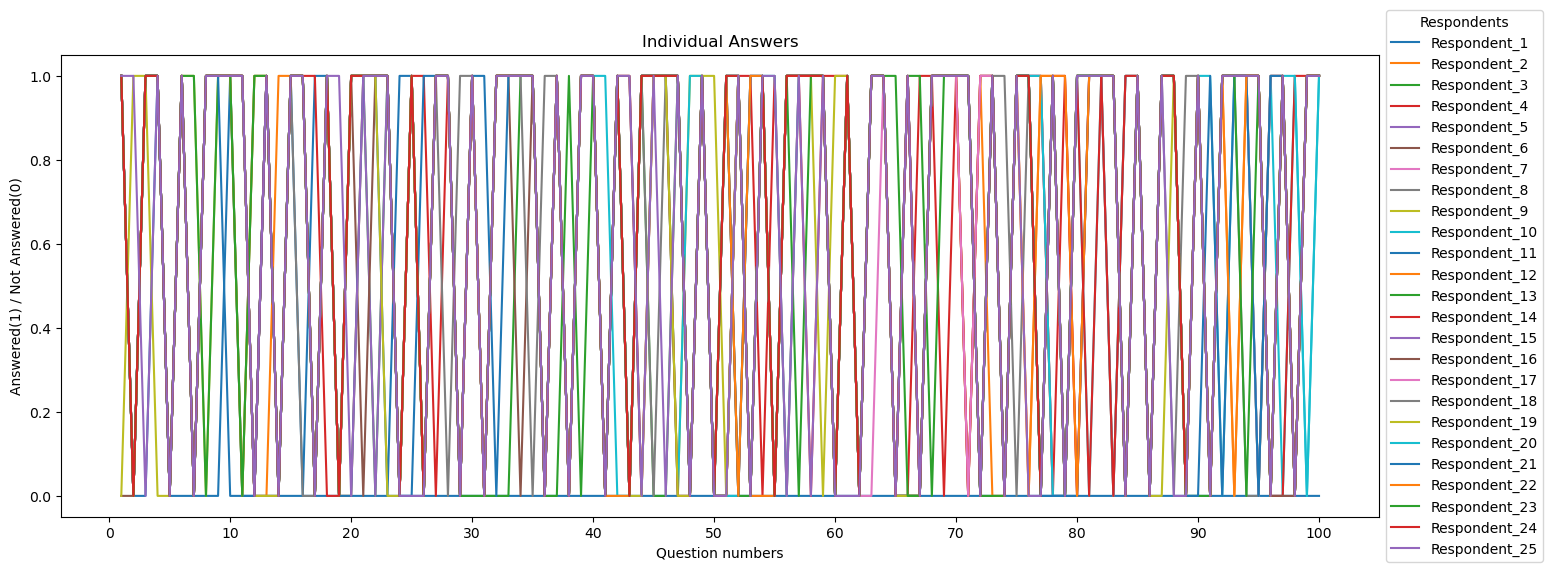

In [49]:
visualize_data(collated_answers_path, 2)

In [4]:
visualize_data(collated_answers_path, 3)

error: n!=1, n!=2
